###### USC ID  : 8534717045
###### NAME   : SRINATH BEGUDEM
###### GITHUB: SrinathBegudem

#### Home Work - 3 (PART-I)

#### Libraries

In [1]:
import re
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.feature_selection import RFE

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

1. Time Series Classification Part 1: Feature Creation/Extraction
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/ Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\ %29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
def list_directory(path):
    return sorted(glob.glob(os.path.join(path, '*')))

data_directory_path = 'AReM/'
activity_directories = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
column_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
training_dataset, testing_dataset = [], []
count_samples, test_files_count, data_dict_updated = 0, 2, {}

for activity in activity_directories:
    directory_path = data_directory_path + activity
    list_of_files = sorted(list_directory(directory_path), key=lambda x: int(re.match('\D*(\d+)', x).group(1)))
    test_files_count = 3 if activity not in ['bending1', 'bending2'] else 2
    count_samples, dataset_list_updated = 0, []
    
    for file in list_of_files:
        data_frame = pd.read_csv(file, skiprows=5, header=None, names=column_names).fillna(0)
        dataset_list_updated.append(data_frame)
        count_samples += 1
        testing_dataset.append(data_frame) if count_samples <= test_files_count else training_dataset.append(data_frame)
    
    data_dict_updated[activity] = dataset_list_updated


In [3]:
print("Data distribution per activity:")
for activity, datasets in data_dict_updated.items():
    print(f"{activity}: {len(datasets)} files")

Data distribution per activity:
bending1: 7 files
bending2: 6 files
cycling: 15 files
lying: 15 files
sitting: 15 files
standing: 15 files
walking: 15 files


In [4]:
print("Total training samples:", sum(len(datasets) for datasets in training_dataset))
combined_training_data = pd.concat(training_dataset, ignore_index=True)
print("\nCombined Training Dataset:")
print(combined_training_data.head())
print("Shape of Combined Training Dataset:", combined_training_data.shape)

Total training samples: 33119

Combined Training Dataset:
   time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      42.00       0.71      21.25       0.43      30.00       0.00
1   250      41.50       0.50      20.25       1.48      31.25       1.09
2   500      41.50       0.50      14.25       1.92      33.00       0.00
3   750      40.75       0.83      15.75       0.43      33.00       0.00
4  1000      40.00       0.71      20.00       2.74      32.75       0.43
Shape of Combined Training Dataset: (33119, 7)


In [5]:
print("Total testing samples:", sum(len(datasets) for datasets in testing_dataset))
combined_testing_data = pd.concat(testing_dataset, ignore_index=True)
print("\nCombined Testing Dataset:")
print(combined_testing_data.head())
print("Shape of Combined Testing Dataset:", combined_testing_data.shape)

Total testing samples: 9120

Combined Testing Dataset:
   time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      39.25       0.43      22.75       0.43      33.75        1.3
1   250      39.25       0.43      23.00       0.00      33.00        0.0
2   500      39.25       0.43      23.25       0.43      33.00        0.0
3   750      39.50       0.50      23.00       0.71      33.00        0.0
4  1000      39.50       0.50      24.00       0.00      33.00        0.0
Shape of Combined Testing Dataset: (9120, 7)


In [6]:
combined_data = pd.concat([combined_training_data, combined_testing_data], ignore_index=True)

print("\nCombined Dataset:")
print(combined_data.head())
print("Shape of Combined Dataset:", combined_data.shape)


Combined Dataset:
   time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      42.00       0.71      21.25       0.43      30.00       0.00
1   250      41.50       0.50      20.25       1.48      31.25       1.09
2   500      41.50       0.50      14.25       1.92      33.00       0.00
3   750      40.75       0.83      15.75       0.43      33.00       0.00
4  1000      40.00       0.71      20.00       2.74      32.75       0.43
Shape of Combined Dataset: (42239, 7)


(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

- Mean
- Median
- Standard Deviation
- Variance
- Minimum
- Maximum
- Range
- Skewness
- Kurtosis
- 1st Quartile
- 3rd Quartile
- InterQuartile Range (IQR)
- Mean Absolute Deviation (MAD)
- Root Mean Square (RMS)
- Coefficient of Variation (CV)
- Hurst Exponent / Signal-to-Noise Ratio (SNR) - depends on the nature of data

ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [7]:
from collections import defaultdict

In [8]:
statistics_dict = defaultdict(dict)
counter = 0

for activity_name in activity_directories:
    for dataset_instance in data_dict_updated[activity_name]:
        counter += 1
        for feature_id, column_name in enumerate(column_names[1:], start=1):
            stats = dataset_instance[column_name].describe()
            statistics_dict[counter].update({
                f'{stat_type}{feature_id}': stats[stat_type] for stat_type in ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
            })

stats_table = pd.DataFrame(statistics_dict).T

stats_table


,min1,max1,mean1,50%1,std1,25%1,75%1,min2,max2,mean2,...,std5,25%5,75%5,min6,max6,mean6,50%6,std6,25%6,75%6
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [9]:
def calculate_confidence_interval(data_values, sample_time, confidence=0.1):
    std_dev_list = [np.std(np.random.choice(data_values, size=len(data_values))) for _ in range(sample_time)]
    lower_index, upper_index = int(sample_time * (1 - confidence) / 2), int(sample_time * (1 + confidence) / 2)
    sorted_sample = sorted(std_dev_list)
    lower_bound, upper_bound = sorted_sample[lower_index], sorted_sample[upper_index]
    return round(lower_bound, 2), round(upper_bound, 2)


result_dict = {}

for column_name, column_values in stats_table.items():
    std_dev = statistics.stdev(column_values)
    lower_bound, upper_bound = calculate_confidence_interval(column_values, 10)
    result_dict[column_name] = [std_dev, (lower_bound, upper_bound)]

print(pd.DataFrame.from_dict(result_dict, orient='index', columns=['std_dev', 'interval']))


         std_dev      interval
min1   10.057319  (9.71, 9.93)
max1    6.414651   (6.39, 6.4)
mean1   6.695044  (6.63, 6.74)
50%1    6.777133  (5.32, 5.36)
std1    1.790065  (1.82, 1.84)
25%1    7.264299  (6.99, 7.04)
75%1    6.665176  (4.98, 5.68)
min2    0.000000    (0.0, 0.0)
max2    5.075845  (4.92, 4.99)
mean2   1.576651  (1.59, 1.62)
50%2    1.412244  (1.39, 1.39)
std2    0.887141  (0.88, 0.91)
25%2    0.946386  (0.94, 0.94)
75%2    2.129681  (2.07, 2.09)
min3    2.956462  (2.96, 2.97)
max3    5.378333   (5.4, 5.48)
mean3   4.239378  (4.19, 4.19)
50%3    4.282748  (4.35, 4.55)
std3    1.020560  (1.07, 1.07)
25%3    4.358157  (4.13, 4.44)
75%3    4.500988  (4.55, 4.66)
min4    0.000000    (0.0, 0.0)
max4    2.286737  (2.18, 2.24)
mean4   1.172682  (1.14, 1.18)
50%4    1.150647  (1.12, 1.13)
std4    0.470070  (0.46, 0.46)
25%4    0.843620  (0.83, 0.83)
75%4    1.561101  (1.56, 1.57)
min5    6.105679  (5.83, 6.03)
max5    6.298931  (5.83, 6.08)
mean5   5.922424  (5.28, 5.84)
50%5    

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).



**Mean:** This represents the average value of the dataset, providing a central point that indicates the general tendency of the data points. The mean is useful for understanding the overall level of the measured variable and is often used in conjunction with other metrics to provide a more complete picture of the data's characteristics.

**Maximum:** This indicates the highest value in the dataset, which can be crucial for identifying peaks or extreme values. The maximum value is particularly important in contexts where outliers or peak performance metrics are of interest, as it helps to understand the upper limits of the data.

**Third Quartile (Q3):** The third quartile represents the value below which 75% of the data falls. It provides insights into the upper range of the data distribution and can help identify higher percentile behavior.

**Standard Deviation:** This measures the dispersion or variability of the dataset. A higher standard deviation indicates that the data points are spread out over a larger range of values, which can be important for understanding the volatility or consistency of the data.

**Skewness:** This measures the asymmetry of the data distribution around its mean. Positive skew indicates a distribution with an asymmetric tail extending towards more positive values, while negative skew indicates a tail extending towards more negative values. Skewness can provide insights into the nature of the distribution of observed values, which can be crucial for certain types of statistical analysis where normal distribution is assumed.


2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + ϵ. 

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(b) Answer (a) using test rather than training RSS.

(c) Suppose that the true relationship between X and Y is not linear,but we don’t know how far it is from linear. Consider the trainingRSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

(d) Answer (c) using test rather than training RSS.

Part (a): Training RSS for Linear vs. Cubic Regression with a Linear True Relationship

Given a true linear relationship between $X$ and $Y$, the training RSS for a linear regression model directly reflects the variance in the data that is not explained by the linear model. In contrast, a cubic regression ($Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$) can potentially fit the training data more closely due to its additional parameters, allowing for a lower training RSS. However, this does not imply that cubic regression is more appropriate; it merely has greater flexibility, which may lead to overfitting, especially if the true underlying relationship is indeed linear.

Part (b): Test RSS for Linear vs. Cubic Regression with a Linear True Relationship

When evaluating the model's performance on unseen data (test RSS), the simpler linear regression model is expected to outperform the cubic regression if the true relationship is linear. This is because the cubic regression's added complexity, while potentially reducing training RSS, is likely to result in overfitting, capturing noise in the training data as if it were a true signal. Consequently, the linear model, being more aligned with the true linear relationship, is expected to generalize better, leading to a lower test RSS.

Part (c): Training RSS for Linear vs. Cubic Regression with a Nonlinear True Relationship

If the true relationship between $X$ and $Y$ is nonlinear, the training RSS comparison between linear and cubic regression models becomes contingent on the nature of the nonlinearity. The cubic regression's flexibility enables it to model complex relationships more effectively, likely resulting in a lower training RSS compared to the linear model. This assumes that the nonlinearity in the true relationship can be better captured by the cubic model's additional terms.

Part (d): Test RSS for Linear vs. Cubic Regression with a Nonlinear True Relationship

For a nonlinear true relationship, the test RSS will critically depend on the model's ability to generalize beyond the training data. The cubic regression may offer a better fit for the training data and, if the nonlinearity it models is reflective of the true relationship, could potentially lead to a lower test RSS. However, the risk of overfitting remains significant; if the cubic model captures noise as signal, its performance on new data may degrade. Conversely, a linear model, despite possibly having a higher bias for assuming linearity, might exhibit lower variance and better generalization to new data, particularly if the true relationship's deviation from linearity is modest.

In essence, the choice between a linear and cubic model for both training and test RSS should be informed by the underlying relationship's complexity and the models' respective bias-variance trade-offs.


#### Home Work - 4 (PART-II)

4. Time Series Classification Part 2: Binary and Multiclass Classification
Important Note: You will NOT submit this part with Homework 3. How- ever, because it uses the features you extracted from time series data in Homework 3, and because some of you may want to start using your fea- tures to build models earlier, you are provided with the instructions of the next programming assignment. Thus, you may want to submit the code for Homework 3 with Homework 4 again, since it might need the feature creation code. Also, since this part involves building various models, you are strongly recommended to start as early as you can.

(a) Binary Classification Using Logistic Regression

i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [10]:
statistics_dict = defaultdict(dict)
counter = 0

for activity_name in activity_directories:
    for dataset_instance in data_dict_updated[activity_name]:
        counter += 1
        for feature_id, column_name in enumerate(column_names[1:], start=1):
            stats = dataset_instance[column_name].describe()
            statistics_dict[counter].update({
                f'{stat_type}{feature_id}': stats[stat_type] for stat_type in ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
            })

stats_table = pd.DataFrame(statistics_dict).T

stats_table

,min1,max1,mean1,50%1,std1,25%1,75%1,min2,max2,mean2,...,std5,25%5,75%5,min6,max6,mean6,50%6,std6,25%6,75%6
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


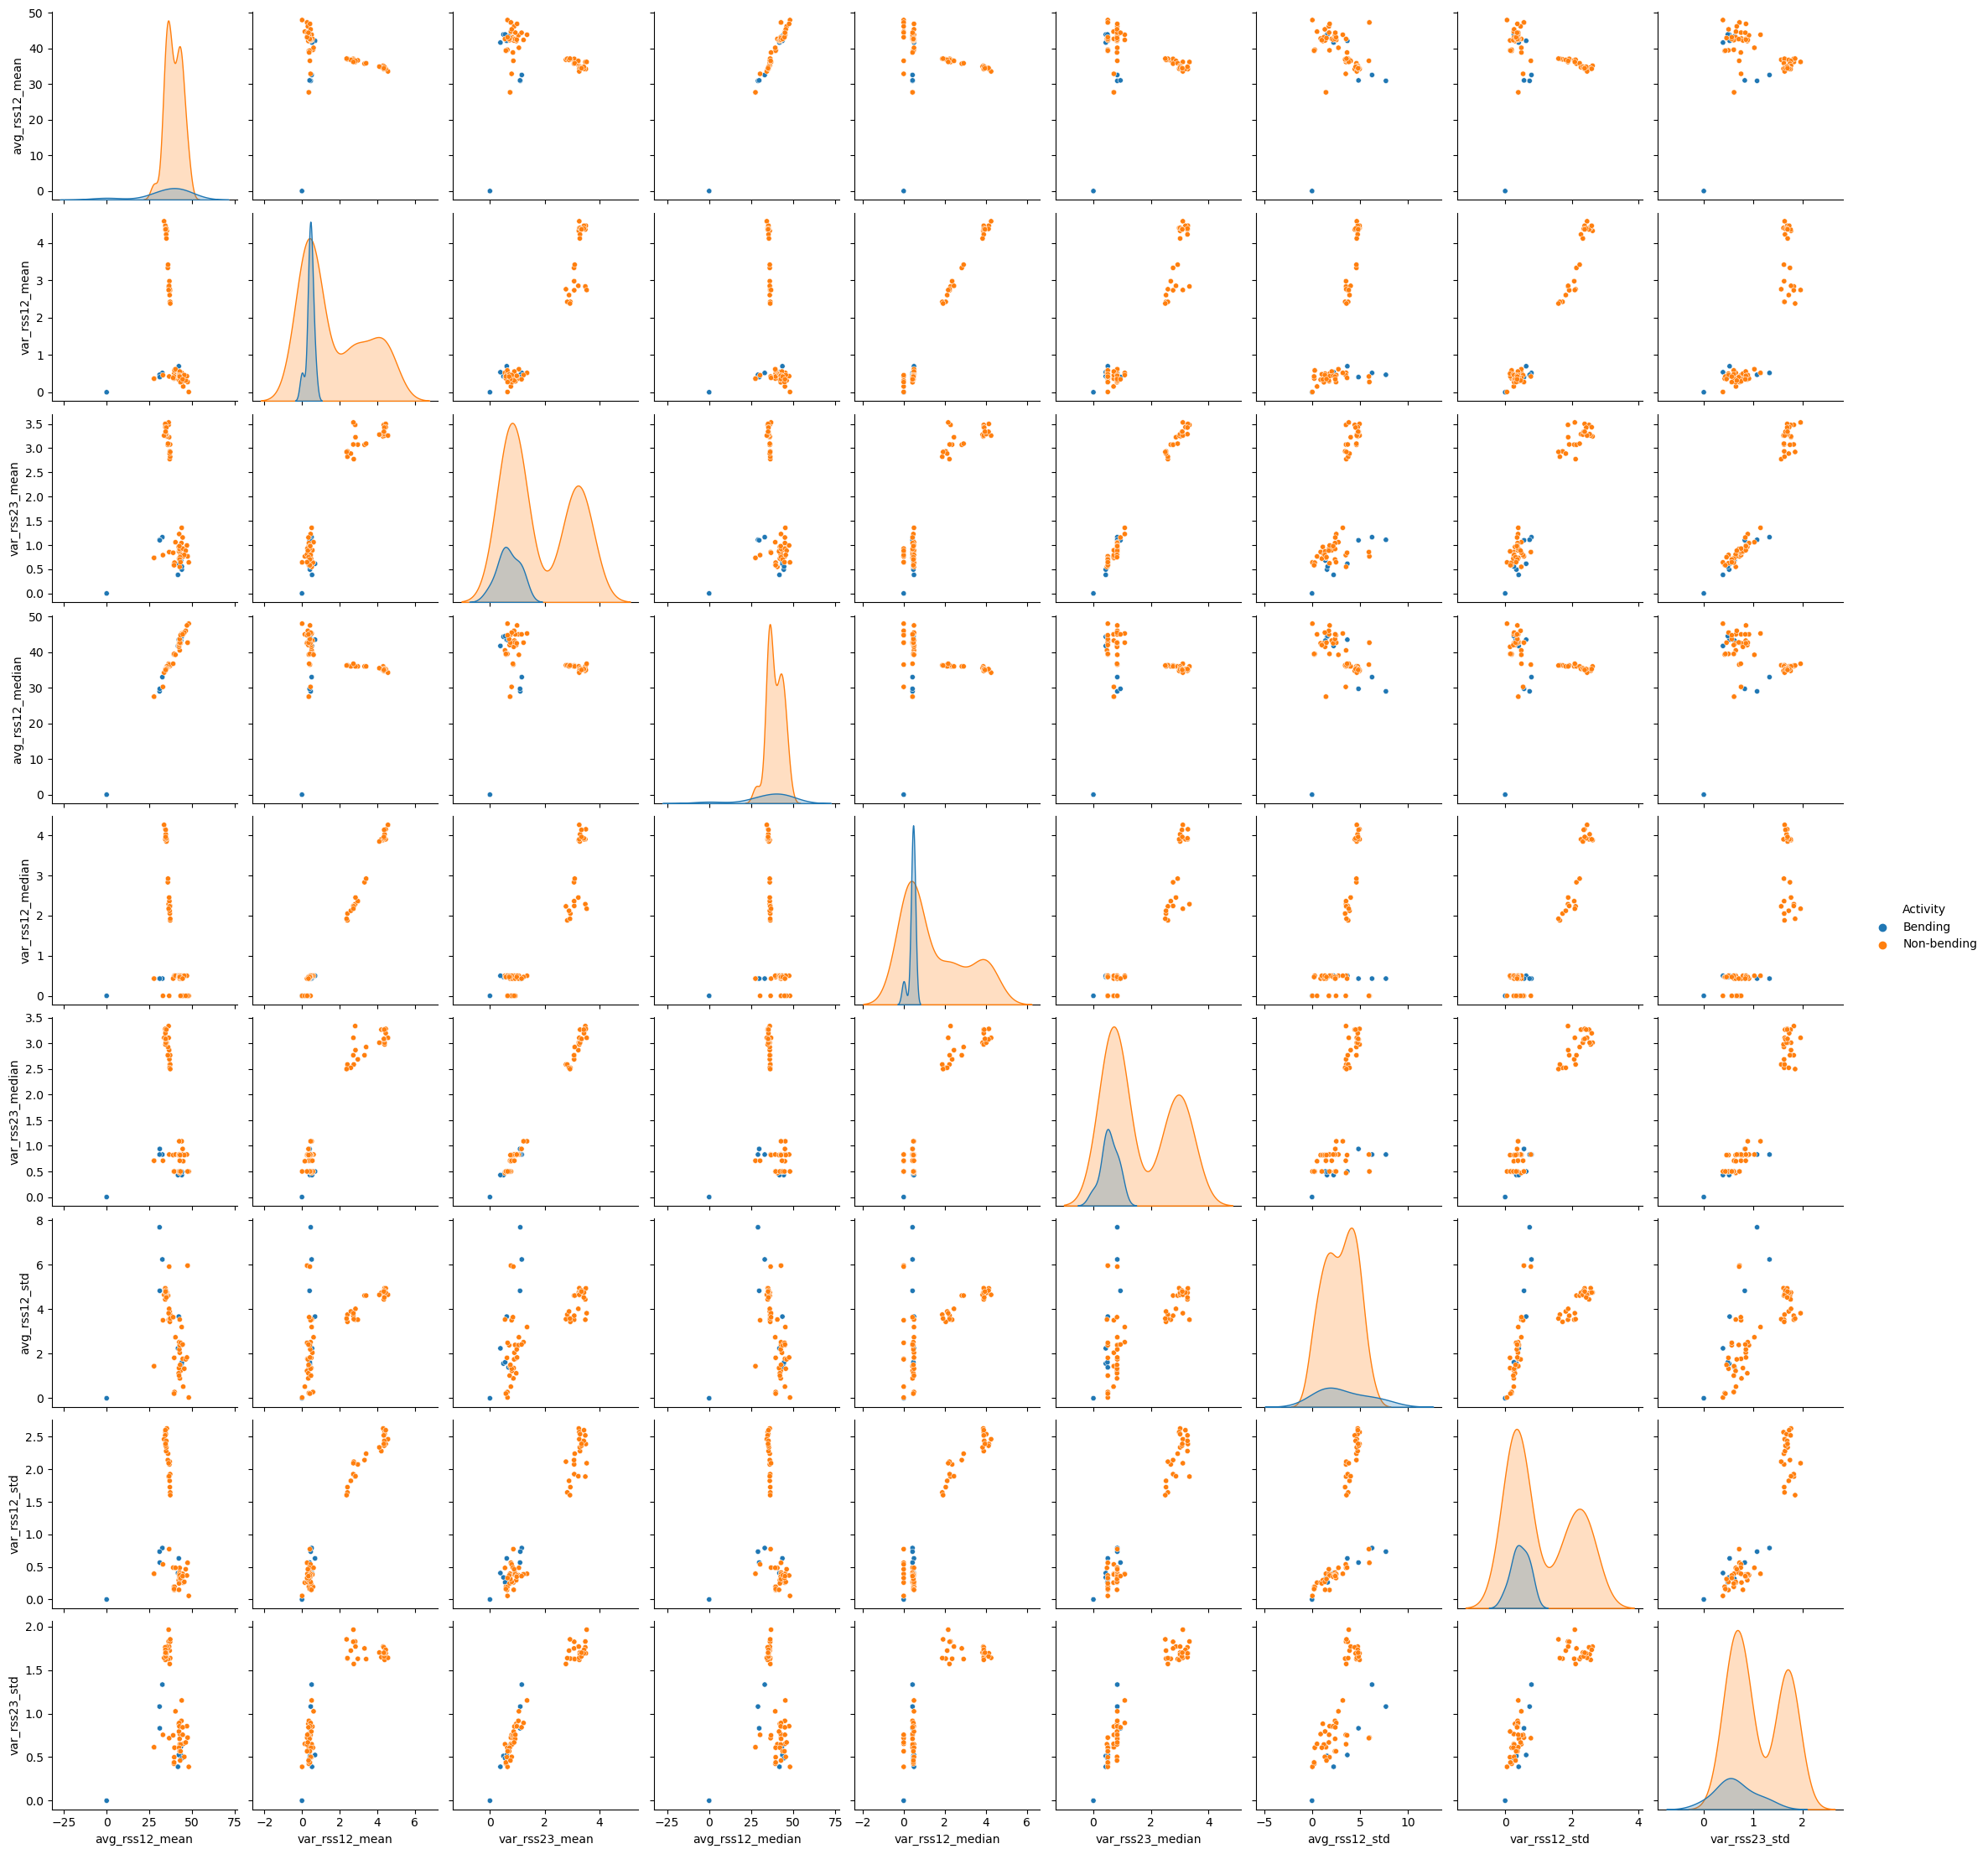

In [11]:
def generate_pair_plot(features, training_data):
    count = 0
    feature_dict = {'Activity': ['Bending' if (count := count + 1) <= 9 else 'Non-bending' for _ in training_data],
                    **{f"{feature}_mean": [stats['mean'] for s in training_data for stats in [s[feature].describe()]] 
                       for feature in features},
                    **{f"{feature}_median": [stats['50%'] for s in training_data for stats in [s[feature].describe()]] 
                       for feature in features},
                    **{f"{feature}_std": [stats['std'] for s in training_data for stats in [s[feature].describe()]] 
                       for feature in features}}
    
    df = pd.DataFrame(feature_dict)
    sns.pairplot(df, hue='Activity', plot_kws={'s': 20})

features = ['avg_rss12', 'var_rss12', 'var_rss23']
generate_pair_plot(features, training_dataset)


ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

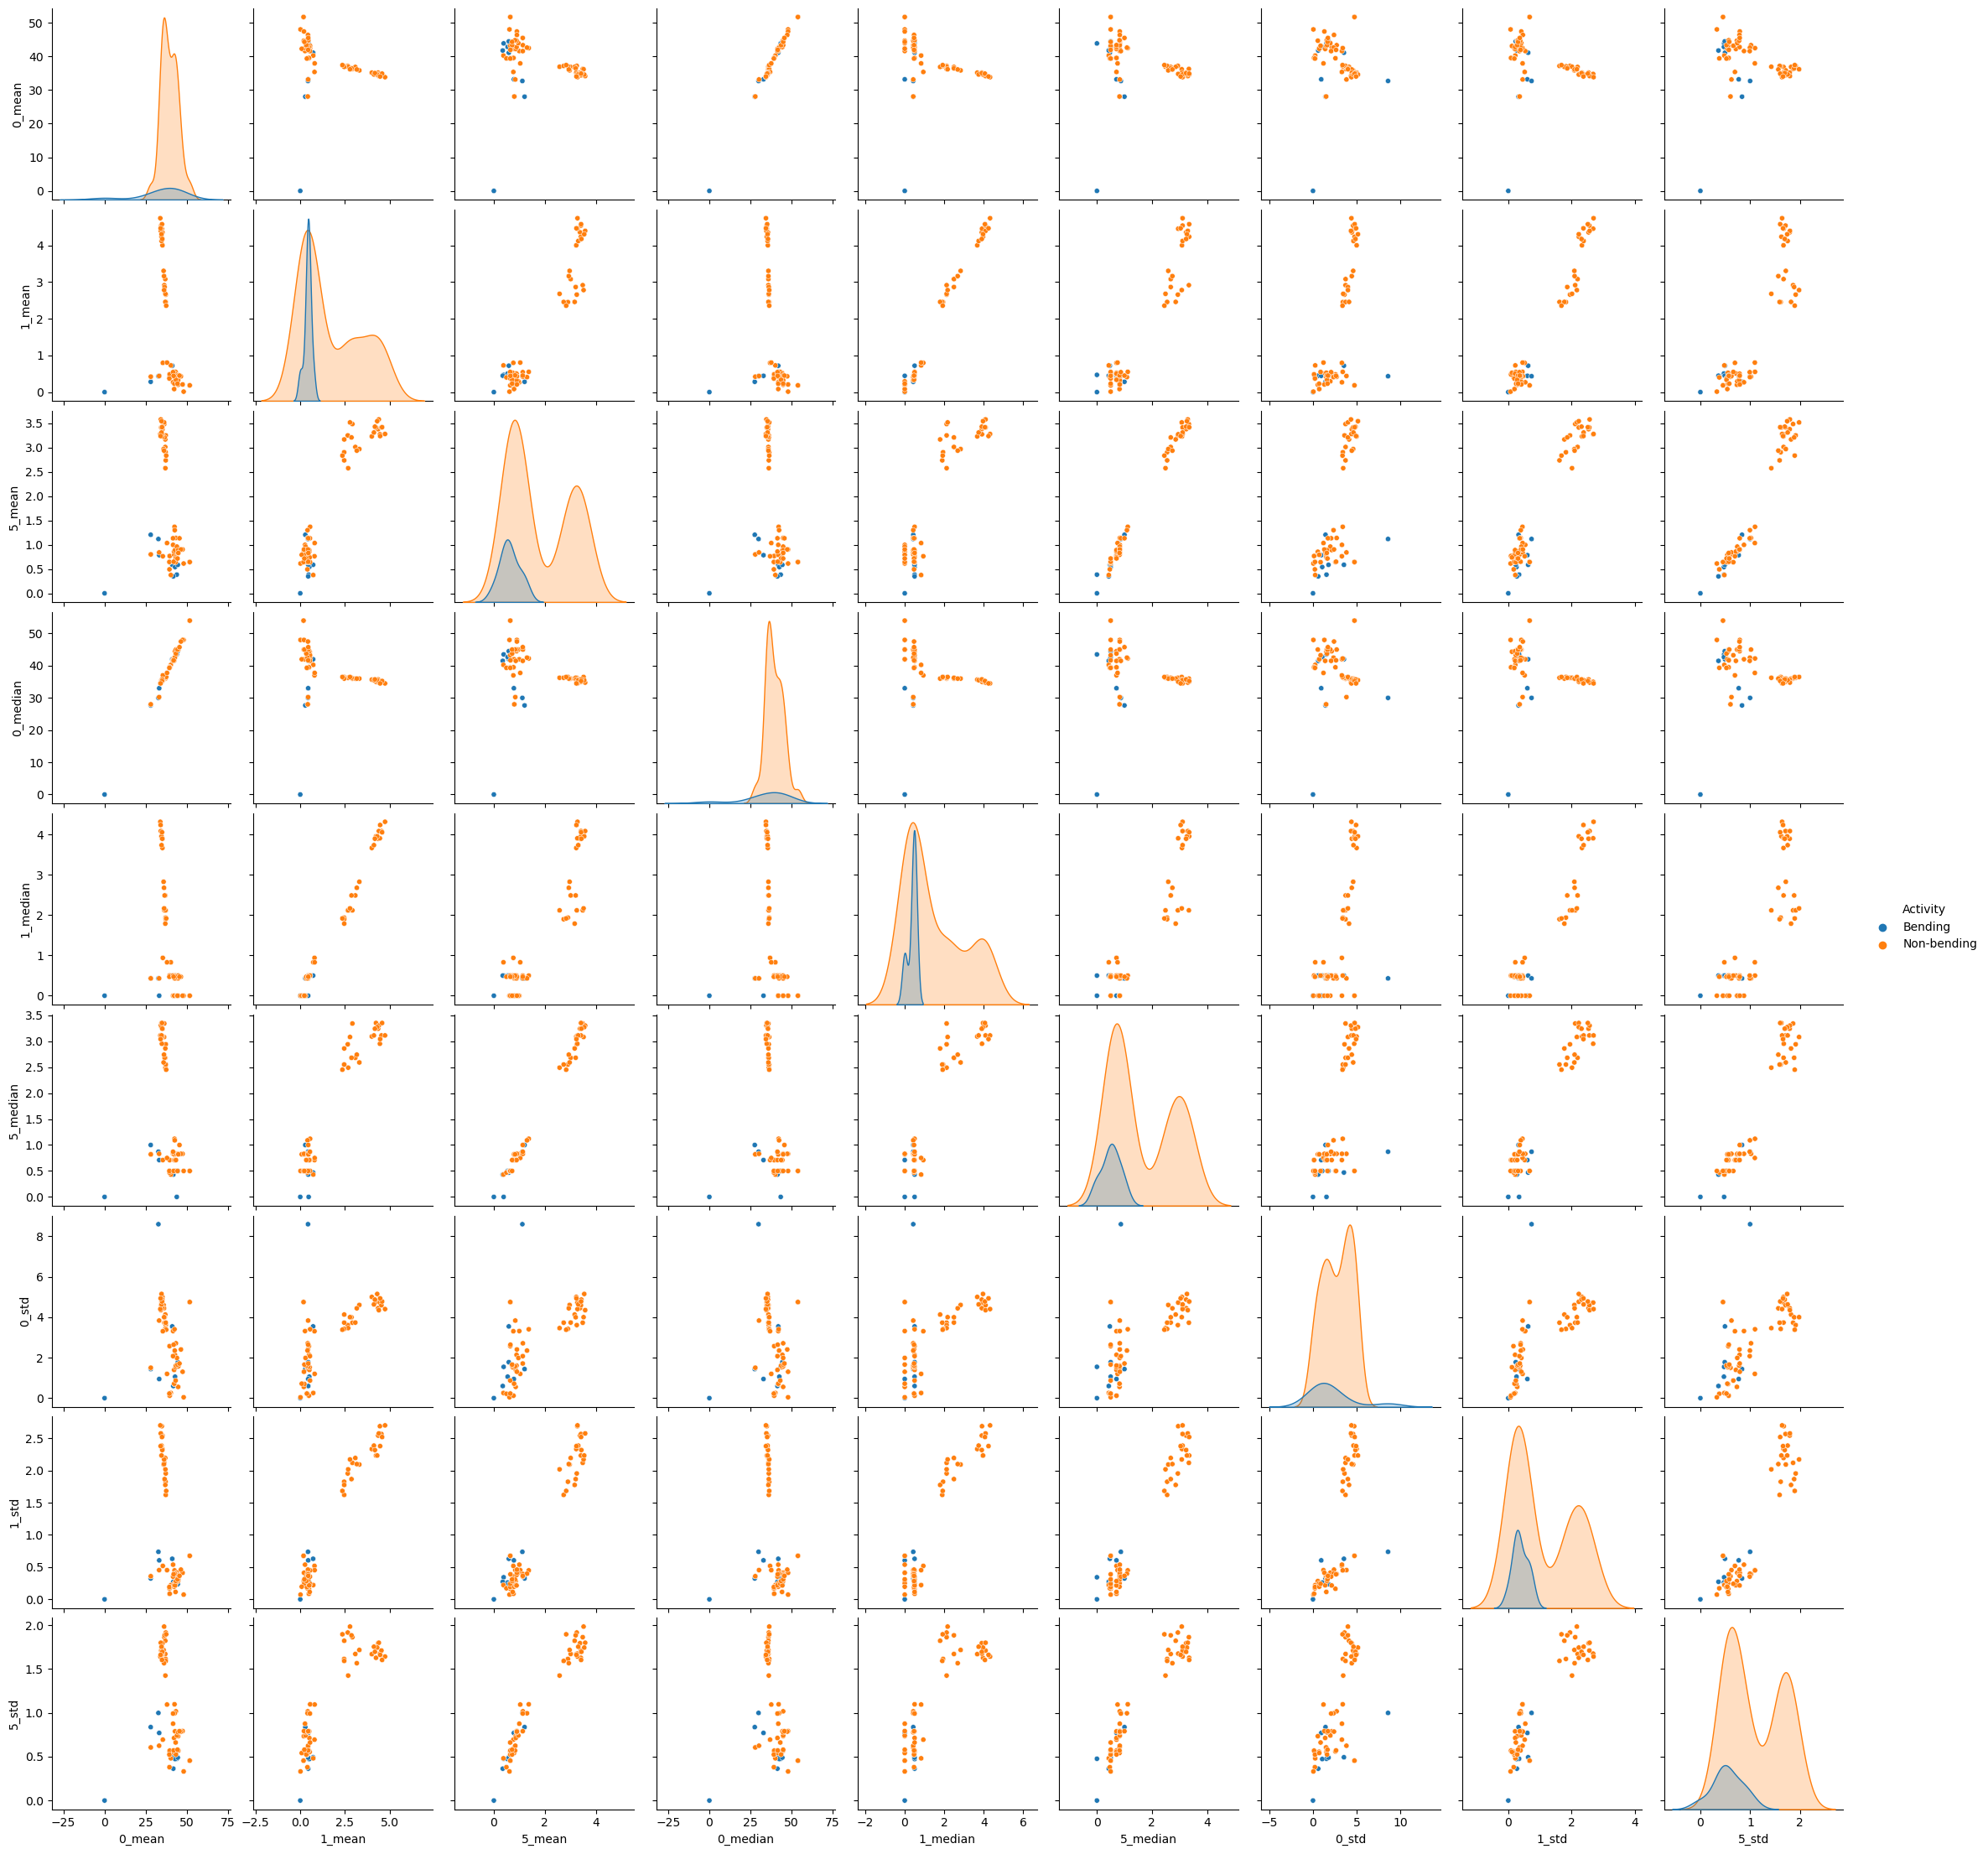

In [12]:
def break_time_series(input_dataset, num_parts):
    parts_dataset = list()
    for data_frame in input_dataset:
        size = round(len(data_frame) / num_parts)
        data_frame_parts = [data_frame.iloc[i:i+size-1, :] for i in range(0, len(data_frame), size)]
        temp_data_frame = pd.DataFrame()
        for part in range(num_parts):
            data_frame_parts[part].index = range(len(data_frame_parts[part]))  # Rearrangement of indices before concatenating
            temp_data_frame = pd.concat([data_frame_parts[part].iloc[:, 1:], temp_data_frame], axis=1, ignore_index=True)  # Removing the time column
        parts_dataset.append(temp_data_frame)
    return parts_dataset

features = [0, 1, 5] 
new_training_dataset = break_time_series(training_dataset, 2) 
generate_pair_plot(features, new_training_dataset)  

We can observe that there is no difference in the timeseries results comparing to 2(a)i

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [13]:
def preprocess_data(data_list, num_bending=9):
    # Bending: 1, Non-Bending: 0
    count = 0
    train_labels = list()
    train_features = list()
    for data_frame in data_list:
        count += 1
        if count <= num_bending:
            train_labels.append(1)
        else:
            train_labels.append(0)
        train_features.append(data_frame)
    return train_features, train_labels

def calculate_statistics(data_list):
    data_rows = list()
    stats_data = list()
    for data_frame in data_list:
        for column in data_frame:
            stats = data_frame[column].describe()
            data_rows.append(stats['mean'])
            data_rows.append(stats['50%'])
            data_rows.append(stats['std'])
        stats_data.append(data_rows)
        data_rows = []
    stats_data = pd.DataFrame(stats_data)
    return stats_data

for l_value in range(1, 21):
    new_training_data = break_time_series(training_dataset, l_value)
    features_data, labels_data = preprocess_data(new_training_data)
    train_features = calculate_statistics(features_data)
    classifier = LogisticRegression()
    
    rfe_selector = RFECV(classifier, step=1, cv=5, scoring='accuracy')  
    rfe_selector = rfe_selector.fit(train_features, labels_data)
    f1_train_score = f1_score(labels_data, rfe_selector.predict(train_features))
    print('L:', l_value)
    print('F1 train score:', round(f1_train_score, 2))
    print('P Value (Optimal number of features) :', rfe_selector.n_features_)
    print('Best features :', train_features.columns[rfe_selector.support_])
    print('----------------------------------------------')


L: 1
F1 train score: 0.89
P Value (Optimal number of features) : 6
Best features : Index([0, 3, 12, 14, 15, 16], dtype='int64')
----------------------------------------------
L: 2
F1 train score: 1.0
P Value (Optimal number of features) : 30
Best features : Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 16, 17, 19, 20,
       23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35],
      dtype='int64')
----------------------------------------------
L: 3
F1 train score: 1.0
P Value (Optimal number of features) : 21
Best features : Index([0, 1, 4, 8, 9, 10, 12, 14, 15, 16, 18, 20, 24, 26, 33, 34, 38, 43, 48,
       49, 51],
      dtype='int64')
----------------------------------------------
L: 4
F1 train score: 1.0
P Value (Optimal number of features) : 26
Best features : Index([ 6,  7, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 27, 28, 32, 33, 34, 51,
       52, 56, 61, 62, 66, 67, 68, 69],
      dtype='int64')
----------------------------------------------
L: 5
F1 train score: 1.0

When conducting cross-validation, RFECV is the appropriate technique as the p-values approach is significantly slower than RFECV


iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.


In [14]:
features_data, labels_data = preprocess_data(break_time_series(training_dataset, 10))
train_features = calculate_statistics(features_data)
train_features = train_features.iloc[:, [73, 74, 156, 157]]

In [15]:
from sklearn import metrics, model_selection, svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB

ols_model = sm.OLS(labels_data, train_features).fit()
print("Summary of OLS Model:\n", ols_model.summary(), '\nP-Values:\n', ols_model.pvalues)


Summary of OLS Model:
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              30.98
Date:                Fri, 01 Mar 2024   Prob (F-statistic):                    1.94e-14
Time:                        22:03:27   Log-Likelihood:                          9.1771
No. Observations:                  69   AIC:                                     -10.35
Df Residuals:                      65   BIC:                                     -1.418
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [16]:
logistic_regression_model = LogisticRegression().fit(train_features, labels_data)
predicted_labels = logistic_regression_model.predict(train_features)
conf_matrix = confusion_matrix(labels_data, predicted_labels)
print('\nConfusion Matrix:\n', conf_matrix)


Confusion Matrix:
 [[60  0]
 [ 0  9]]


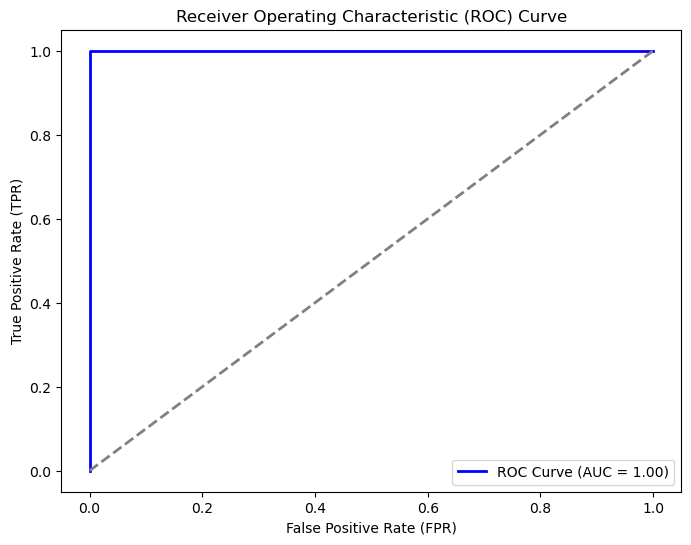

In [17]:
scores = logistic_regression_model.decision_function(train_features)

fp_rate, tp_rate, threshold = roc_curve(labels_data, scores)
roc_auc = auc(fp_rate, tp_rate)

plt.figure(figsize=(8, 6))
plt.plot(fp_rate, tp_rate, lw=2, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [18]:
new_training_data = break_time_series(training_dataset, 10)
train_feats, train_lbls = preprocess_data(new_training_data)
train_feats = calculate_statistics(train_feats)
new_testing_data = break_time_series(testing_dataset, 10)
test_feats, test_lbls = preprocess_data(new_testing_data, 4)
test_feats = calculate_statistics(test_feats)
log_reg_model = LogisticRegression(); rfe_mod = RFECV(log_reg_model, step=1, cv=5, scoring='accuracy').fit(train_feats, train_lbls)
train_accuracy, test_accuracy = rfe_mod.score(train_feats, train_lbls), rfe_mod.score(test_feats, test_lbls)
print(f'Training cross-validation accuracy: {train_accuracy:.2f}')
print(f'Testing cross-validation accuracy: {test_accuracy:.2f}')

Training cross-validation accuracy: 1.00
Testing cross-validation accuracy: 1.00


vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

The classes are clearly divided, but there is still instability.

vii.  From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [19]:
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(train_feats, train_lbls)

log_reg_model = LogisticRegression().fit(x_resampled, y_resampled)
y_pred = log_reg_model.predict(x_resampled)
conf_matrix = metrics.confusion_matrix(y_resampled, y_pred)
print('Confusion matrix:\n', conf_matrix)



Confusion matrix:
 [[60  0]
 [ 0 60]]


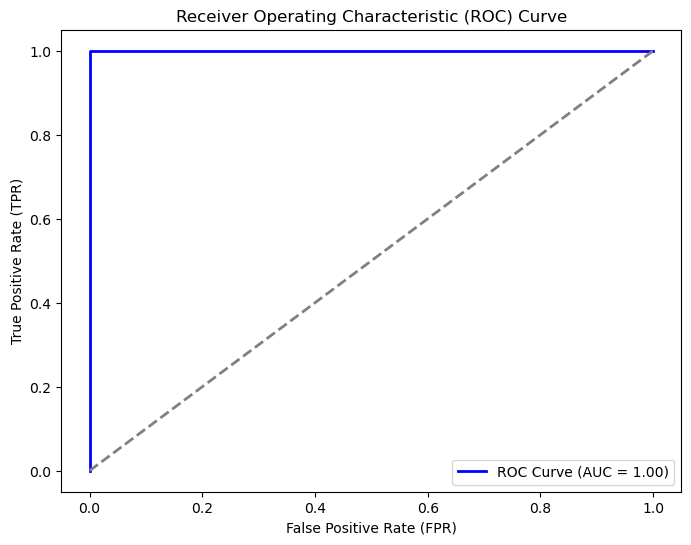

In [20]:
decision_scores = log_reg_model.decision_function(x_resampled)
fpr, tpr, threshold = roc_curve(y_resampled, decision_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

b) Binary Classification Using L1-penalized logistic regression

i. Repeat 4(a)iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [21]:
for l_value in range(1, 21):
    new_training_data = break_time_series(training_dataset, l_value)
    processed_data, train_labels = preprocess_data(new_training_data)
    train_features = calculate_statistics(processed_data)
    
    # Normalized data
    normalized_train_features = preprocessing.scale(train_features)
    
    logistic_reg_model = LogisticRegressionCV(
        penalty='l1',
        cv=5,
        solver='saga',
        multi_class="ovr",
        scoring='accuracy',
        refit=True
    ).fit(normalized_train_features, train_labels)
    
    accuracy = logistic_reg_model.score(normalized_train_features, train_labels)
    
    print('Value of L:', l_value, '\tAccuracy:', accuracy)


Value of L: 1 	Accuracy: 0.9710144927536232
Value of L: 2 	Accuracy: 1.0
Value of L: 3 	Accuracy: 1.0
Value of L: 4 	Accuracy: 0.9565217391304348
Value of L: 5 	Accuracy: 0.9565217391304348
Value of L: 6 	Accuracy: 1.0
Value of L: 7 	Accuracy: 1.0
Value of L: 8 	Accuracy: 0.9710144927536232
Value of L: 9 	Accuracy: 1.0
Value of L: 10 	Accuracy: 0.9855072463768116
Value of L: 11 	Accuracy: 0.9710144927536232
Value of L: 12 	Accuracy: 0.9855072463768116
Value of L: 13 	Accuracy: 1.0
Value of L: 14 	Accuracy: 1.0
Value of L: 15 	Accuracy: 1.0
Value of L: 16 	Accuracy: 1.0
Value of L: 17 	Accuracy: 1.0
Value of L: 18 	Accuracy: 1.0
Value of L: 19 	Accuracy: 1.0
Value of L: 20 	Accuracy: 1.0


ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

1. In cross validation, the L1-penalized model performs better and has good accuracy 
2. Unlike selection using p-value, we do not need to manually select the features following a laborious computation of p-values, therefore the L1-regularization is for implementation.

(c) Multi-class Classification (The Realistic Case)
i. Find the best l in the same way as you found it in 4(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [22]:
def map_data_to_labels(dataset, data_type):
    data_lengths = [7, 6, 15, 15, 15, 15, 15]
    labels, features, count = [], [], 0
    for data_frame in dataset:
        count += 1
        features.append(data_frame)
        if data_type == 'test':
            if count <= 4: 
                labels.append(0)
            elif 5 <= count <= 7: 
                labels.append(1)
            elif 8 <= count <= 10: 
                labels.append(2)
            elif 11 <= count <= 13: 
                labels.append(3)
            elif 14 <= count <= 16: 
                labels.append(4)
            else: 
                labels.append(5)
        else:
            if count <= 9: 
                labels.append(0)
            elif 10 <= count <= 21: 
                labels.append(1)
            elif 22 <= count <= 33: 
                labels.append(2)
            elif 34 <= count <= 45: 
                labels.append(3)
            elif 46 <= count <= 57: 
                labels.append(4)
            else: 
                labels.append(5)
    return features, labels

for l_value in range(1, 21):
    new_train_data = break_time_series(training_dataset, l_value)
    train_features, train_labels = map_data_to_labels(new_train_data, 'train')
    train_features_stats = calculate_statistics(train_features)
    
    new_test_data = break_time_series(testing_dataset, l_value)
    test_features, test_labels = map_data_to_labels(new_test_data, 'test')
    test_features_stats = calculate_statistics(test_features)

    model = LogisticRegressionCV(
        penalty='l1',
        solver='saga',
        cv=5,
        multi_class='multinomial',
        scoring='accuracy'
    ).fit(train_features_stats, train_labels)
    
    test_accuracy = model.score(test_features_stats, test_labels)
    
    print('Value of L:', l_value)
    print('\tTest Accuracy:', round(test_accuracy, 5))
    
print('\tModel Details:')
print('\t\tPenalty:', model.penalty)
print('\t\tSolver:', model.solver)
print('\t\tCross-validation:', model.cv)
print('\t\tMulti-class:', model.multi_class)
print('\t\tScoring:', model.scoring)


Value of L: 1
	Test Accuracy: 0.94737
Value of L: 2
	Test Accuracy: 0.84211
Value of L: 3
	Test Accuracy: 0.84211
Value of L: 4
	Test Accuracy: 0.84211
Value of L: 5
	Test Accuracy: 0.84211
Value of L: 6
	Test Accuracy: 0.78947
Value of L: 7
	Test Accuracy: 0.84211
Value of L: 8
	Test Accuracy: 0.89474
Value of L: 9
	Test Accuracy: 0.84211
Value of L: 10
	Test Accuracy: 0.89474
Value of L: 11
	Test Accuracy: 0.84211
Value of L: 12
	Test Accuracy: 0.89474
Value of L: 13
	Test Accuracy: 0.89474
Value of L: 14
	Test Accuracy: 0.89474
Value of L: 15
	Test Accuracy: 0.84211
Value of L: 16
	Test Accuracy: 0.89474
Value of L: 17
	Test Accuracy: 0.84211
Value of L: 18
	Test Accuracy: 0.84211
Value of L: 19
	Test Accuracy: 0.89474
Value of L: 20
	Test Accuracy: 0.84211
	Model Details:
		Penalty: l1
		Solver: saga
		Cross-validation: 5
		Multi-class: multinomial
		Scoring: accuracy


In [23]:
new_train_data = break_time_series(training_dataset, 1)
train_features, train_labels = map_data_to_labels(new_train_data, 'train')
train_features_stats = calculate_statistics(train_features)

new_test_data = break_time_series(testing_dataset, 1)
test_features, test_labels = map_data_to_labels(new_test_data, 'test')
test_features_stats = calculate_statistics(test_features)

model = LogisticRegressionCV(
    penalty='l1',             
    solver='saga',            
    cv=5,                  
    multi_class='multinomial',
    scoring='accuracy'        
).fit(train_features_stats, train_labels) 
accuracy = model.score(test_features_stats, test_labels)
y_test_predict = model.predict(test_features_stats)

conf_matrix = metrics.confusion_matrix(test_labels, y_test_predict, labels=[0, 1, 2, 3, 4, 5])
print('Confusion matrix:\n', conf_matrix)


Confusion matrix:
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


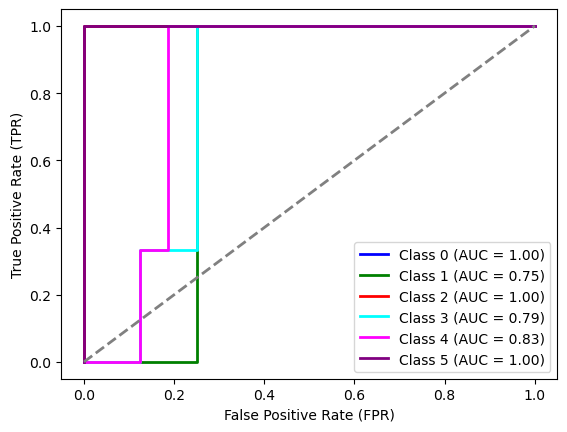

In [24]:
decision_scores = model.decision_function(test_features_stats)
true_positive_rates, false_positive_rates, auc_scores = {}, {}, {}

# Define colors for each class
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'purple']

for class_index in range(6):
    false_positive_rates[class_index], true_positive_rates[class_index], _ = roc_curve(test_labels, decision_scores[:, class_index], pos_label=class_index)
    auc_scores[class_index] = auc(false_positive_rates[class_index], true_positive_rates[class_index])

plt.figure()
[plt.plot(false_positive_rates[i], true_positive_rates[i], lw=2, label=f'Class {i} (AUC = %0.2f)' % auc_scores[i], color=colors[i]) for i in range(6)]
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')  # Identity line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()



ii. Repeat 4(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [25]:
for l in range(1, 21):
    new_train_data = break_time_series(training_dataset, l)
    train_features, train_labels = map_data_to_labels(new_train_data, 'train')
    train_statistics = calculate_statistics(train_features)

    new_test_data = break_time_series(testing_dataset, l)
    test_features, test_labels = map_data_to_labels(new_test_data, 'test')
    test_statistics = calculate_statistics(test_features)
    
    model = GaussianNB().fit(train_statistics, train_labels)
    test_accuracy = model.score(test_statistics, test_labels)
    
    print('Value of L:', l)
    print('\tTest Accuracy:', round(test_accuracy, 5))


Value of L: 1
	Test Accuracy: 0.89474
Value of L: 2
	Test Accuracy: 0.78947
Value of L: 3
	Test Accuracy: 0.84211
Value of L: 4
	Test Accuracy: 0.89474
Value of L: 5
	Test Accuracy: 0.89474
Value of L: 6
	Test Accuracy: 0.84211
Value of L: 7
	Test Accuracy: 0.84211
Value of L: 8
	Test Accuracy: 0.84211
Value of L: 9
	Test Accuracy: 0.84211
Value of L: 10
	Test Accuracy: 0.84211
Value of L: 11
	Test Accuracy: 0.84211
Value of L: 12
	Test Accuracy: 0.84211
Value of L: 13
	Test Accuracy: 0.84211
Value of L: 14
	Test Accuracy: 0.89474
Value of L: 15
	Test Accuracy: 0.84211
Value of L: 16
	Test Accuracy: 0.84211
Value of L: 17
	Test Accuracy: 0.84211
Value of L: 18
	Test Accuracy: 0.84211
Value of L: 19
	Test Accuracy: 0.89474
Value of L: 20
	Test Accuracy: 0.84211


Confusion matrix
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


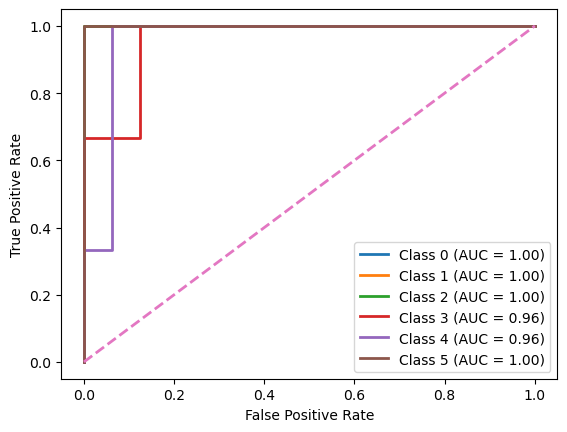

In [26]:
new_train_data = break_time_series(training_dataset, 4)
train_features, train_labels = map_data_to_labels(new_train_data, 'train')
train_data_features = calculate_statistics(train_features)

new_test_data = break_time_series(testing_dataset, 4)
test_features, test_labels = map_data_to_labels(new_test_data, 'test')
test_data_features = calculate_statistics(new_test_data)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(train_data_features, train_labels)
test_predictions = naive_bayes_model.predict(test_data_features)

conf_matrix = metrics.confusion_matrix(test_labels, test_predictions, labels=[0, 1, 2, 3, 4, 5])
print('Confusion matrix\n', conf_matrix)

class_probabilities = naive_bayes_model.predict_log_proba(test_data_features)

true_positive_rates = dict()
false_positive_rates = dict()
roc_auc_values = dict()

for i in range(6):
    false_positive_rates[i], true_positive_rates[i], _ = roc_curve(test_labels, class_probabilities[:, i], pos_label=i)
    roc_auc_values[i] = auc(false_positive_rates[i], true_positive_rates[i])

plt.figure()
for i in range(6):
    plt.plot(false_positive_rates[i], true_positive_rates[i], lw=2, label=f'Class {i} (AUC = %0.2f)' % roc_auc_values[i])

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [27]:
from sklearn.naive_bayes import MultinomialNB



for l in range(1, 21):
    new_train_data = break_time_series(training_dataset, l)
    train_features, train_labels = map_data_to_labels(new_train_data, 'train')
    train_statistics = calculate_statistics(train_features)

    new_test_data = break_time_series(testing_dataset, l)
    test_features, test_labels = map_data_to_labels(new_test_data, 'test')
    test_statistics = calculate_statistics(test_features)
    
    model = MultinomialNB().fit(train_statistics, train_labels)
    test_accuracy = model.score(test_statistics, test_labels)
    
    print(f'Value of L: {l}')
    print(f'\tTest Accuracy: {test_accuracy:.5f}')


Value of L: 1
	Test Accuracy: 0.89474
Value of L: 2
	Test Accuracy: 0.89474
Value of L: 3
	Test Accuracy: 0.94737
Value of L: 4
	Test Accuracy: 0.89474
Value of L: 5
	Test Accuracy: 0.89474
Value of L: 6
	Test Accuracy: 0.89474
Value of L: 7
	Test Accuracy: 0.89474
Value of L: 8
	Test Accuracy: 0.94737
Value of L: 9
	Test Accuracy: 0.89474
Value of L: 10
	Test Accuracy: 0.94737
Value of L: 11
	Test Accuracy: 0.94737
Value of L: 12
	Test Accuracy: 0.94737
Value of L: 13
	Test Accuracy: 0.94737
Value of L: 14
	Test Accuracy: 0.94737
Value of L: 15
	Test Accuracy: 0.94737
Value of L: 16
	Test Accuracy: 0.94737
Value of L: 17
	Test Accuracy: 0.94737
Value of L: 18
	Test Accuracy: 0.94737
Value of L: 19
	Test Accuracy: 0.94737
Value of L: 20
	Test Accuracy: 0.94737


Confusion matrix
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


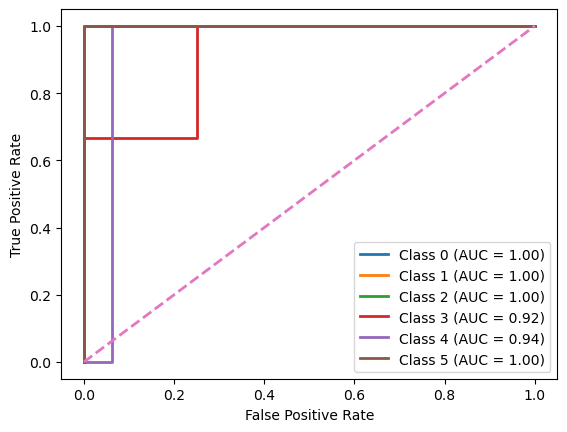

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_data_features, train_labels)
test_predictions = naive_bayes_model.predict(test_data_features)

conf_matrix = metrics.confusion_matrix(test_labels, test_predictions, labels=[0, 1, 2, 3, 4, 5])
print('Confusion matrix\n', conf_matrix)


class_probabilities = naive_bayes_model.predict_log_proba(test_data_features)

true_positive_rates = dict()
false_positive_rates = dict()
roc_auc_values = dict()

for i in range(6):
    false_positive_rates[i], true_positive_rates[i], _ = roc_curve(test_labels, class_probabilities[:, i], pos_label=i)
    roc_auc_values[i] = auc(false_positive_rates[i], true_positive_rates[i])

plt.figure()
for i in range(6):
    plt.plot(false_positive_rates[i], true_positive_rates[i], lw=2, label=f'Class {i} (AUC = %0.2f)' % roc_auc_values[i])

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


iii. Which method is better for multi-class classification in this problem?

Multinomial Naive Bayes is better for features that depend on the frequency and Gaussian is preferred when the features are continuous.

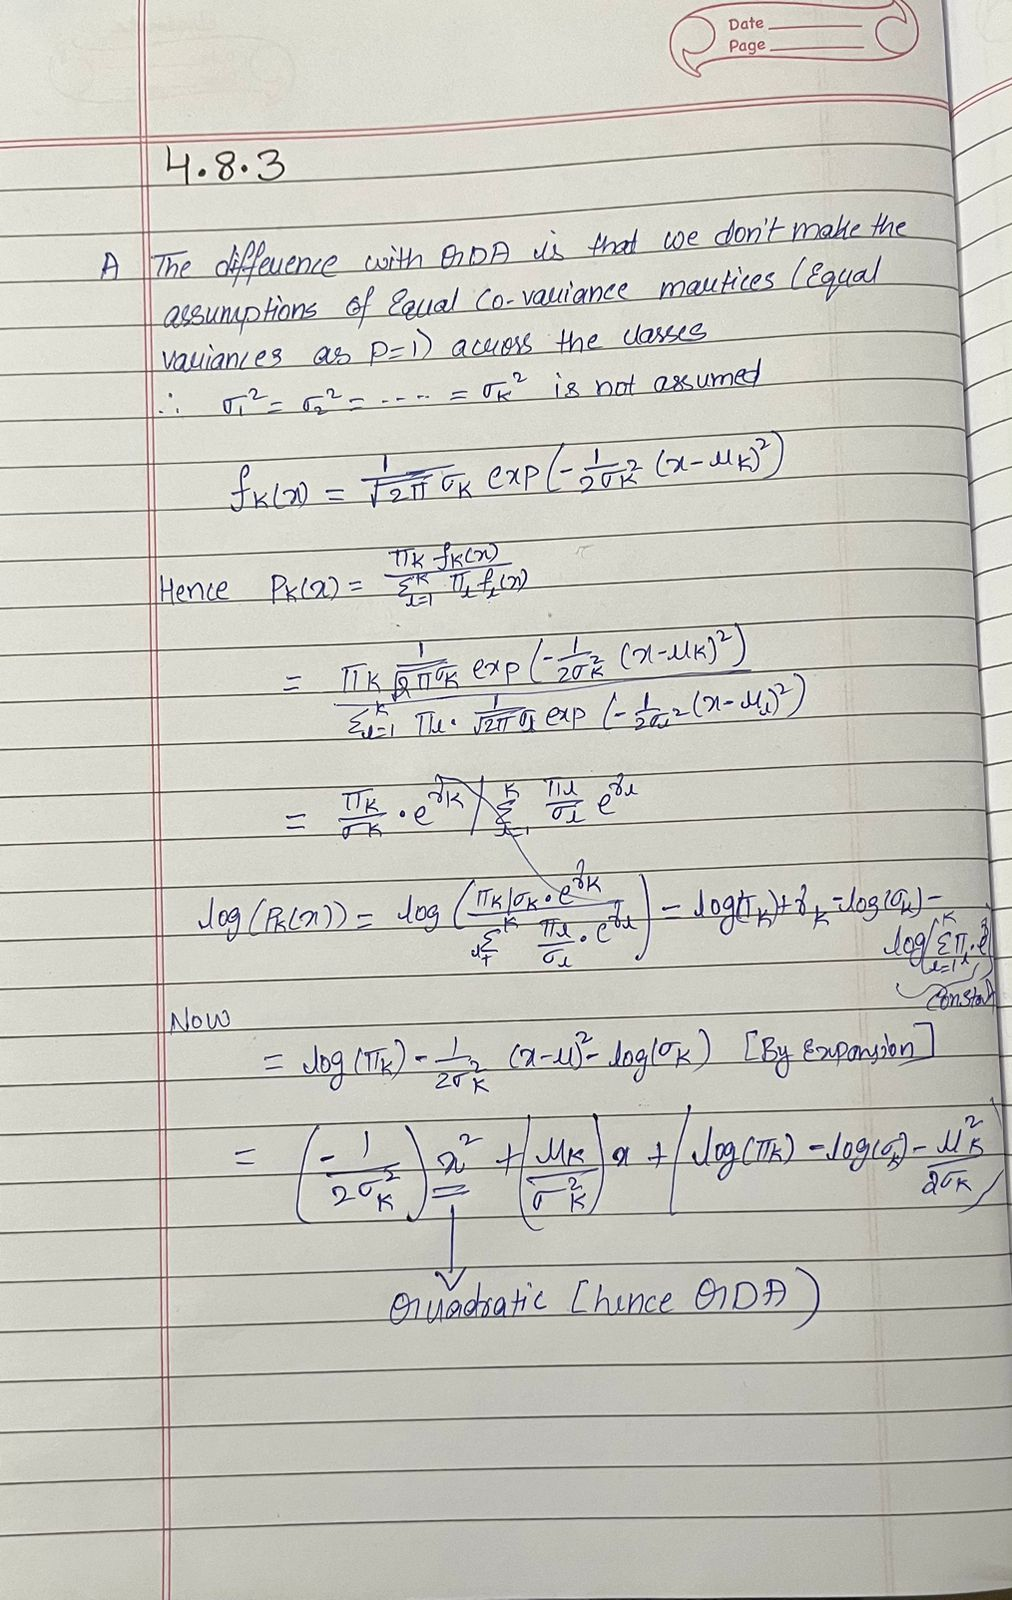

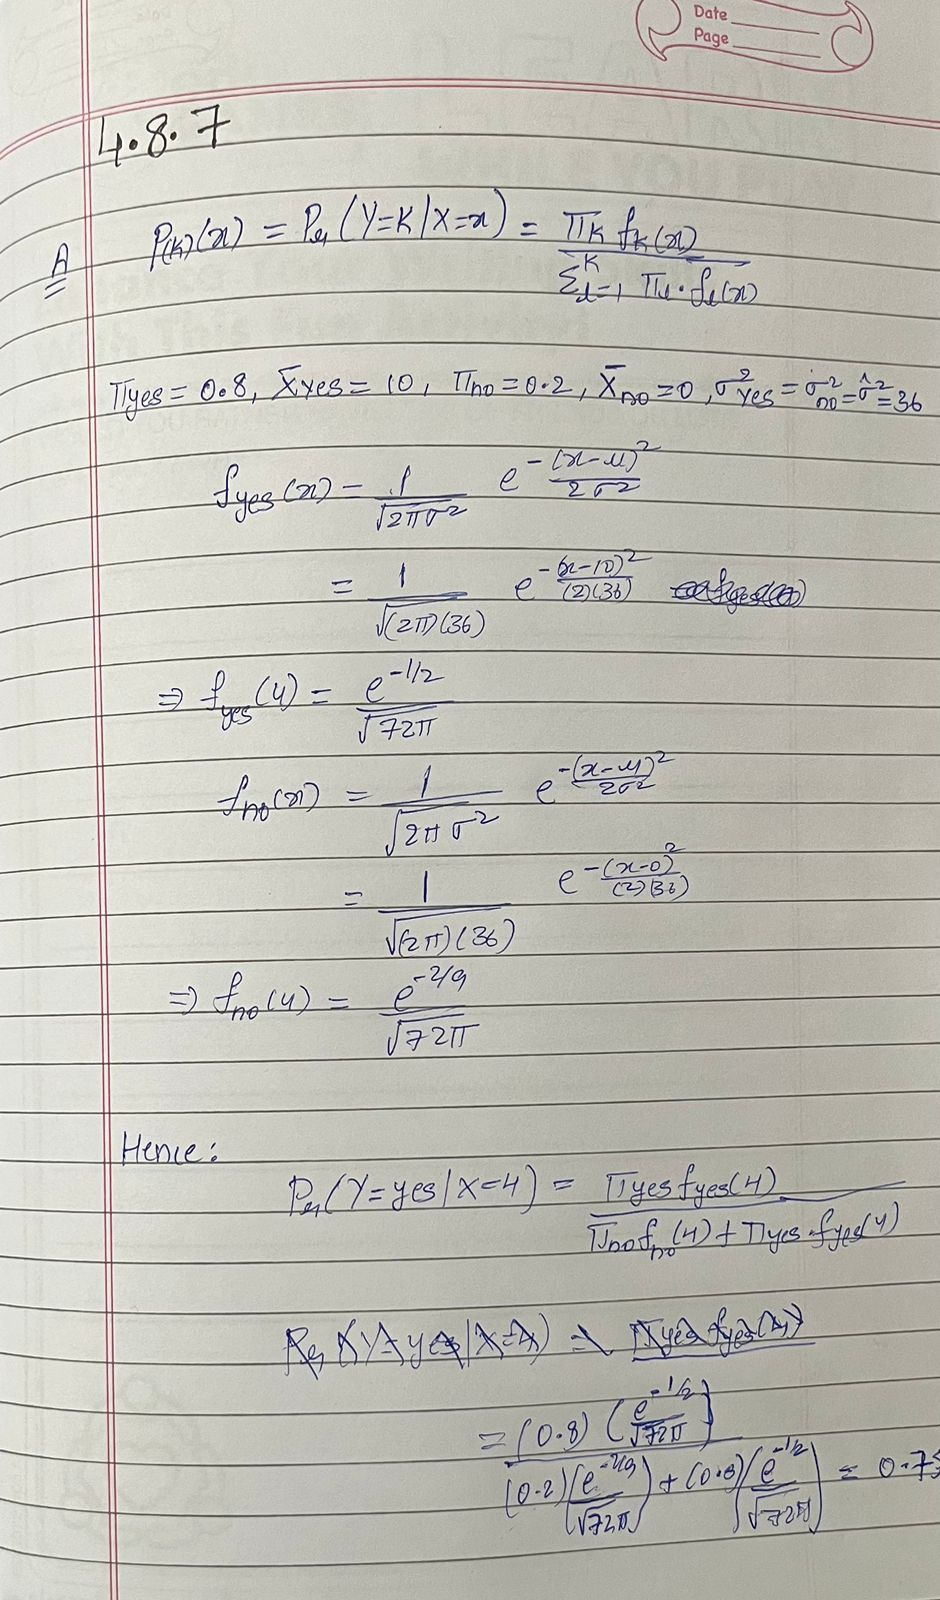